In [5]:
ls DATA/

11593882.tweets.gz* coos.pkl            test_coos.csv


In [35]:
import pandas as pd
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

plt.style.use('bmh')
%load_ext autoreload
%autoreload 2
%matplotlib inline

font = {'family' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)
mpl.rc('legend',fontsize=12)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
mpl.rc('axes',facecolor="white",labelsize=12)
# mpl.rc('text', usetex=True)
PLOT_WIDTH  = 14
PLOT_HEIGHT = 7
colours = [x['color'] for x in list(plt.style.library['bmh']['axes.prop_cycle'])]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
def get_coom(path):
    with open(DATA_PATH,"rb") as f:
        C,V = pickle.load(f)
    C = C.toarray()
    iV = {i:w for w, i in V.items()}        
    words = [iV[i] for i in range(len(iV))]
    cdf = pd.DataFrame(C, index=words, columns=words)
    return cdf

def get_top_coos(C, w, k):
    c = C[w].sort_values(ascending=False)
    top_words = c[:k]
    return top_words

def get_coos(C, words):
    return C.loc[[words, words]]

In [37]:
DATA_PATH="DATA/coos.pkl"
DATA_PATH="DATA/wellness_all_coos.pkl"
C = get_coom(DATA_PATH)


['#health', '#fitness', '#nutrition', '#diet', '#yoga', '#mindfulness', '#healthy', '#meditation', '#exercise', '#healing']


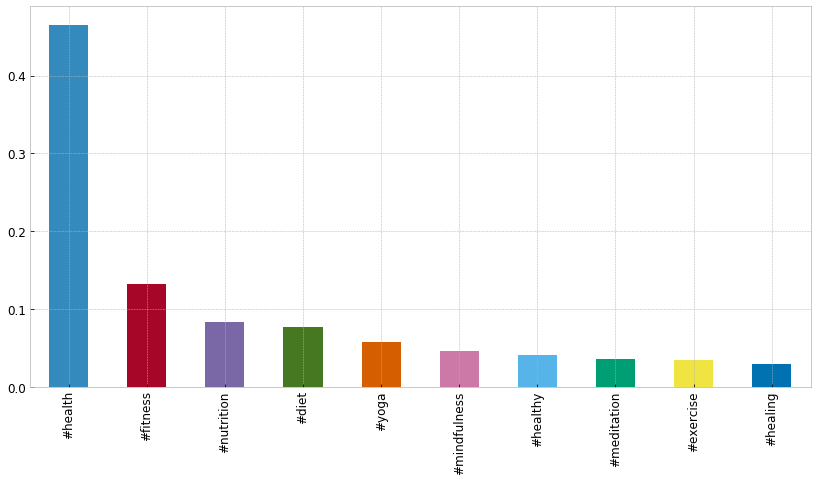

In [38]:
# plot top words
K_top_tokens=10
target_word = "#wellness"
top_words_df = get_top_coos(C,target_word,K_top_tokens)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
top_words_df /= top_words_df.sum()
top_words_df.plot(ax=ax,kind="bar")
top_words=list(top_words_df.keys())
print(top_words)

In [39]:
#build network
c = C.loc[top_words,top_words]
nodes = [{"label": l, "x":random.randint(1,1000), "y":random.randint(1,1000), \
          "id":i, "size":c[l].sum(), "color":colours[i%10]} \
         for i,l in enumerate(top_words)]
edges = []
vs = []
edge_ids = len(top_words)
for i in range(len(top_words)):
    for j in range(len(top_words)):
        if i==j:continue
        v = round(c.loc[top_words[i],top_words[j]], 4) 
        vs.append(v)
#         print("{},{}: {}".format(target[i],target[j],v))
        edge_ids+=1
        edges.append({"source":i,"target":j,"id":edge_ids,"size":v,"color": '#ccc', "type":"curve"})
g = {"edges":edges, "nodes":nodes}
g

{'edges': [{'source': 0,
   'target': 1,
   'id': 11,
   'size': 8756,
   'color': '#ccc',
   'type': 'curve'},
  {'source': 0,
   'target': 2,
   'id': 12,
   'size': 4565,
   'color': '#ccc',
   'type': 'curve'},
  {'source': 0,
   'target': 3,
   'id': 13,
   'size': 6296,
   'color': '#ccc',
   'type': 'curve'},
  {'source': 0,
   'target': 4,
   'id': 14,
   'size': 2981,
   'color': '#ccc',
   'type': 'curve'},
  {'source': 0,
   'target': 5,
   'id': 15,
   'size': 1557,
   'color': '#ccc',
   'type': 'curve'},
  {'source': 0,
   'target': 6,
   'id': 16,
   'size': 1015,
   'color': '#ccc',
   'type': 'curve'},
  {'source': 0,
   'target': 7,
   'id': 17,
   'size': 2231,
   'color': '#ccc',
   'type': 'curve'},
  {'source': 0,
   'target': 8,
   'id': 18,
   'size': 1661,
   'color': '#ccc',
   'type': 'curve'},
  {'source': 0,
   'target': 9,
   'id': 19,
   'size': 1314,
   'color': '#ccc',
   'type': 'curve'},
  {'source': 1,
   'target': 0,
   'id': 20,
   'size': 8756,
  

In [63]:
max(vs)

2.003

In [14]:
from IPython.core.display import HTML

In [15]:
HTML('''<h1>HELLO </h1> ''')

In [19]:
HTML(''' 
<style scoped>
 .steely{
     color:steelBlue;
     font: 6px script
 }
 </style>

<h1 class="steely">HELLO 2 </h1> 
<script>
alert('hello!')
</script>

''')

In [34]:
HTML(''' 
<style scoped>
 .steely{
     color:steelBlue;
     font: 6px script
 }
 </style>

<body>
    <div id="graph-container" onclick="alert('blej')"></div>
    <script src="https://cdn.jsdelivr.net/gh/samiroid/sigma/sigma.min.js"></script>    
<script>
    var i,
    s,
    N = 100,
    E = 500,
    g = {
    nodes: [],
    edges: []
    };


    // Generate a random graph:
    for (i = 0; i < N; i++)
    g.nodes.push({
        id: 'n' + i,
        label: 'Node ' + i,
        x: Math.random(),
        y: Math.random(),
        size: Math.random(),
        color: '#669'
    });
    for (i = 0; i < E; i++)
    g.edges.push({
        id: 'e' + i,
        source: 'n' + (Math.random() * N | 0),
        target: 'n' + (Math.random() * N | 0),
        size: Math.random(),
        color: '#ccc'
    });

    // Instantiate sigma:
s = new sigma({
    graph: g,
    container: 'graph-container',
    settings: {    
        minEdgeSize: 1,
        maxEdgeSize: 10,    
        minNodeSize: 10,
        maxNodeSize: 30,    
        edgeColor: "#ccc",
        labelColor:"node",
        labelSize:"proportional"    
        }
});

</script>
''')

In [29]:
pwd

'/Users/samir/Dev/projects/wellness'